# Homework 2
## **Group 10**: *Ashley Kim, Hayes Gill, Alyson Park, Jilli Connolly, Andrea Schwartz-Silvera, Joshua Greene, Ritvik Panuganti*
* <u> What is an IF Model? </u>
    * A mathematical model used to describe how neurons respond to stimuli

Matplotlib is building the font cache; this may take a moment.


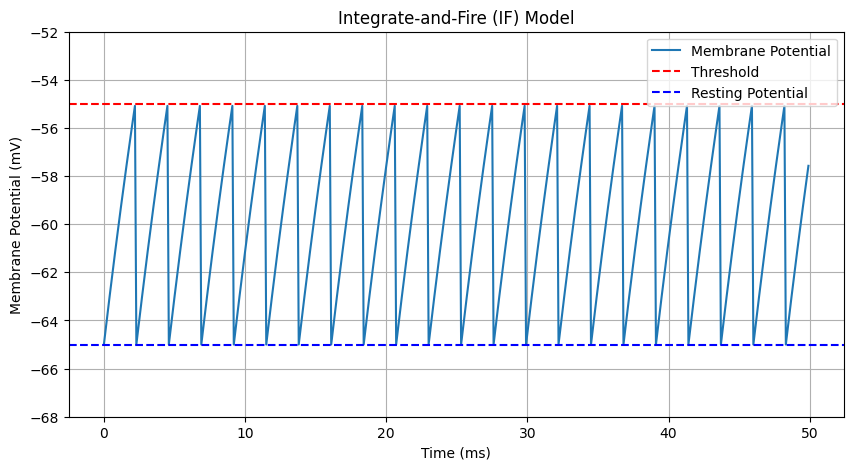

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)
I_ext = 5  # input current (nA)

# Initialize variables
V_m = np.zeros_like(time)
V_m[0] = V_rest
spike_times = []

# Simulation
for t in range(1, len(time)):
    dV = (-(V_m[t - 1] - V_rest) + R * I_ext) / tau_m * dt
    V_m[t] = V_m[t - 1] + dV

    # Check for spike
    if V_m[t] >= V_th:
        V_m[t] = V_reset
        spike_times.append(time[t])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V_m, label="Membrane Potential")
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)  # Set y-axis limits
plt.title("Integrate-and-Fire (IF) Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)
plt.show()

* Looking at the above visualization / based on what you know regarding the LIF model -- what aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron? Compare and Contrast the two.
    * Differences:
      * The model is linear and does not show decay due to leaky ion channels.
      * A biological neuron has complex structures and components that more accurately reflect an action potential
      * Biological repolarization does not occur as quickly, as seen in the model
      * Lack of voltage gated ion channels and inaccurate reflection of refractory periods
      * The IF model is more simplistic and inexpensive in comparison to an actual neuron
    * Similarities
      * Both models show threshold being reached at -55mV
      * Both models highlight the voltage at resting potential
      * An all-or-nothing response
* What was the most challenging aspect of this homework?
    * We were unfamiliar with JupyterLabs and python coding. Also making sense of the cheat sheet
* Estimate how long it took you to complete this homework.
    * Around an hour

# Homework 3

* Hodgkin-Huxley (HH)
    * One of the most famous and widely used models to incorporate voltage-gated ion channels,
including sodium (𝑁𝑁𝑎𝑎+) and potassium (𝐾𝐾+) channels, into the description of neuronal activity and
a more sophisticated/realistic/complicated model compared to I&F or LIF.
    * Limitation: The HH model assumes that all parts of the neuronal membrane (dendrites, soma, and
axons) have the same properties and that all ion channels behave identically.
 * Leaky-Integrate-and-Fire (LIF)
    * basic neuron model that describes how a neuron integrates input signals and fires when it reaches a threshold. It treats the neuron like a capacitor that charges with input and leaks over time. When the voltage hits a set threshold, it "fires" and resets.

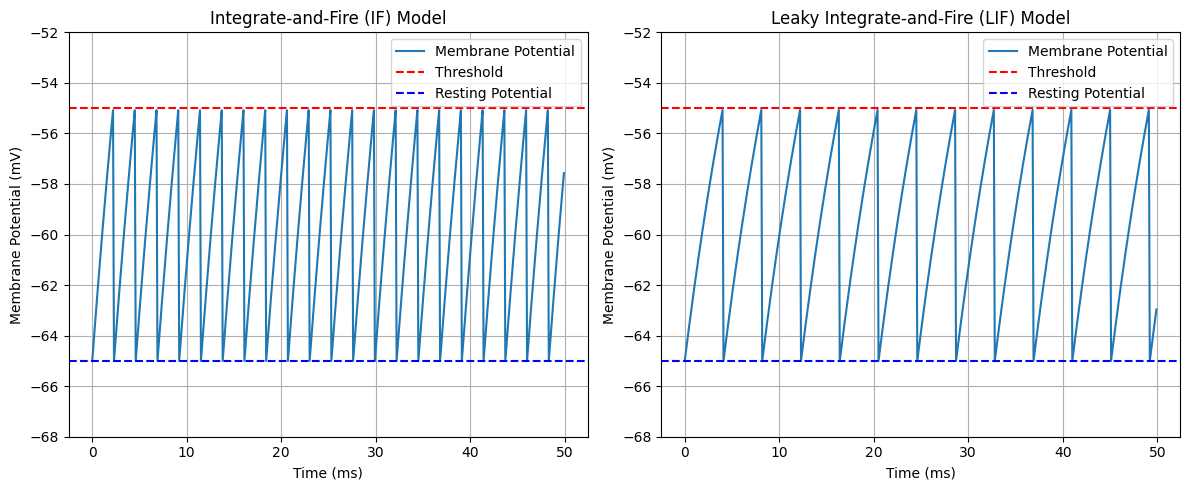

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)
I_ext_if = 5  # Input current for IF model (nA)
I_ext_lif = 3  # Lower input current for LIF model to highlight decay

# === Integrate-and-Fire (IF) Model ===
V_m_if = np.zeros_like(time)
V_m_if[0] = V_rest
spike_times_if = []

for t in range(1, len(time)):
    dV = (-(V_m_if[t - 1] - V_rest) + R * I_ext_if) / tau_m * dt
    V_m_if[t] = V_m_if[t - 1] + dV

    if V_m_if[t] >= V_th:
        V_m_if[t] = V_reset
        spike_times_if.append(time[t])

# === Leaky Integrate-and-Fire (LIF) Model ===
V_m_lif = np.zeros_like(time)
V_m_lif[0] = V_rest
spike_times_lif = []

for t in range(1, len(time)):
    dV = ((V_rest - V_m_lif[t - 1]) / tau_m + I_ext_lif / C) * dt  # Leak term + injected current
    V_m_lif[t] = V_m_lif[t - 1] + dV

    if V_m_lif[t] >= V_th:
        V_m_lif[t] = V_reset
        spike_times_lif.append(time[t])

# === Plot the two models side by side ===
plt.figure(figsize=(12, 5))

# IF Model Plot
plt.subplot(1, 2, 1)
plt.plot(time, V_m_if, label="Membrane Potential")
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.title("Integrate-and-Fire (IF) Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

# LIF Model Plot
plt.subplot(1, 2, 2)
plt.plot(time, V_m_lif, label="Membrane Potential")
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.title("Leaky Integrate-and-Fire (LIF) Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


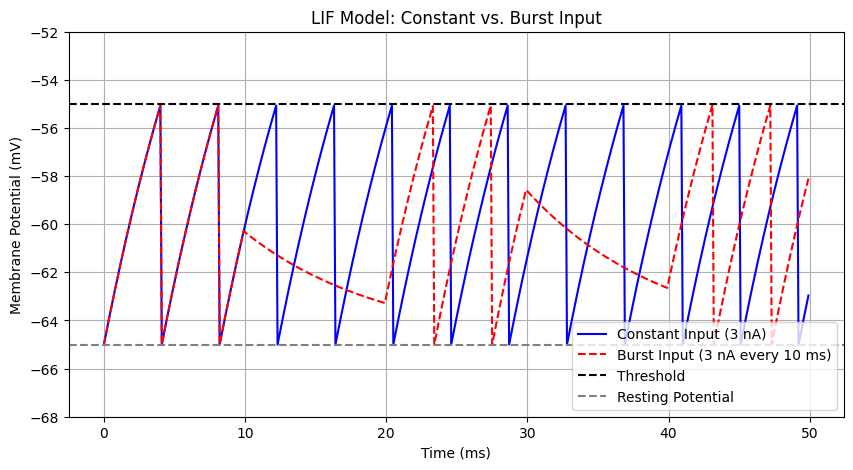

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)

# Input current configurations
I_const = np.full_like(time, 3)  # Constant input (3 nA)
I_burst = np.where((time // 10) % 2 == 0, 3, 0)  # Alternating 3 nA for 10 ms, then 0 nA for 10 ms

# Function to simulate LIF model
def simulate_lif(I_ext):
    V_m = np.zeros_like(time)
    V_m[0] = V_rest
    for t in range(1, len(time)):
        dV = ((V_rest - V_m[t - 1]) / tau_m + I_ext[t] / C) * dt  # LIF equation
        V_m[t] = V_m[t - 1] + dV
        if V_m[t] >= V_th:
            V_m[t] = V_reset  # Reset potential after spike
            spike_times_lif.append(time[t])
    return V_m
    

# Simulate both cases
V_m_const = simulate_lif(I_const)
V_m_burst = simulate_lif(I_burst)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V_m_const, label="Constant Input (3 nA)", color='blue')
plt.plot(time, V_m_burst, label="Burst Input (3 nA every 10 ms)", color='red', linestyle="dashed")
plt.axhline(V_th, color="black", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="gray", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Model: Constant vs. Burst Input")
plt.legend()
plt.grid(True)
plt.show()

* What changes had to be made to update the model and why?
    * The input current had to be changed because the original model used a constant external input, however, to see how different inputs would affect the model we had to change it from constant to dynamic. In order to do this we used a burst input.
* How did you and/or ChatGPT implement the changes? As part of your answer provide in "" the new parts of the code that produce this change.
    * The I_ext_LIF was changed to: "I_const = np.full_like(time, 3)" and "I_burst = np.where((time // 10) % 2 == 0, 3, 0)" to provide two different sources of input.
    * In order to initialize the membrane potential for the new model at resting potential the following code was added:
      "def simulate_lif(I_ext):
        V_m = np.zeros_like(time)
        V_m[0] = V_rest"
    * The plot results are also different as the requirements for the plot were varied.
      "# Plot results
        plt.figure(figsize=(10, 5))
        plt.plot(time, V_m_const, label="Constant Input (3 nA)", color='blue')
        plt.plot(time, V_m_burst, label="Burst Input (3 nA every 10 ms)", color='red', linestyle="dashed")
        plt.axhline(V_th, color="black", linestyle="--", label="Threshold")
        plt.axhline(V_rest, color="gray", linestyle="--", label="Resting Potential")
        plt.ylim(-68, -52)
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mV)")
        plt.title("LIF Model: Constant vs. Burst Input")
        plt.legend()
        plt.grid(True)
        plt.show()"
* Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy? Explain your answer.
    * A bit is the basic unit of information in computing, representing a simple choice between two options, usually 0 or 1. In communication and storage, the number of bits needed to encode a message depends on how uncertain or unpredictable the information is.   Shannon’s entropy measures this uncertainty or the average amount of information in a system. It uses a base-2 logarithm to express entropy in bits. If something is very predictable, entropy is low, meaning fewer bits are needed to describe it. If all possibilities are equally likely, entropy is high, so more bits are required to represent the outcome. The HH model contains the most bits because it represents the most biologically detailed model, which requires the highest number of bits to correctly describe the state of a neuron. The HH model also has the highest Shannon entropy because it has the highest amount of uncertainty due to its complexity. However, of our models the burst input model contains the most bits and has the highest entropy because it produces a more complex output and is less predictable, respectively.

* Reflect on your ability to work collaboratively using Git-Hub. For instance, did you encounter any problems? How did you overcome them? Or are you still unable to make it work?
    * In terms of working collaboratively on GitHub we have been unable to make it work. Collaboration on a single document has not been successful as all group members are unfamiliar with the intricacies of the website. We have worked around this by having one person share their screen and having everyone vocally aid in correctly completing the assignments.